In [28]:
import numpy as np
import torch
import cv2
import sys
import matplotlib.pyplot as plt

from blazebase import resize_pad, denormalize_detections
from blazepalm import BlazePalm
from blazehand_contact import BlazeHandContact
import mediapipe as mp

from utils import *
from visualization import (
    draw_detections, draw_landmarks, draw_roi,
    draw_normalized_hand_landmarks_on_cropped,
    HAND_CONNECTIONS, FACE_CONNECTIONS
)

from contact_dataset import makeTrainValidDataLoaders

gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.set_grad_enabled(True)

contact_regressor = BlazeHandContact().to(gpu)
contact_regressor.load_weights("blazehand_landmark_copy.pth")

train_data_loader, valid_data_loader = makeTrainValidDataLoaders("../all", 0.2, 80)

../all
23650


In [8]:
input_imgs, labels = next(iter(train_data_loader))
input_imgs_np = input_imgs.cpu().numpy().transpose((0, 2, 3, 1))
input_imgs = input_imgs.to(gpu)
labels = labels.to(gpu)

print(input_imgs.shape, labels.shape)

torch.Size([80, 3, 256, 256]) torch.Size([80, 6])


In [9]:
pred = contact_regressor(input_imgs)
print(pred.shape)

torch.Size([80, 6])


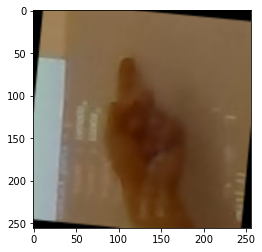

tensor([6.2618e-02, 7.8652e-02, 2.3130e-02, 1.5501e-02, 4.8781e-03, 1.7227e-05],
       device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


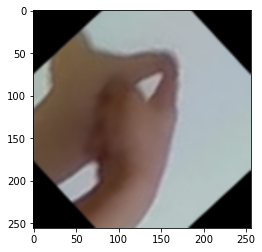

tensor([1.2731e-01, 2.1642e-01, 1.9995e-01, 1.6353e-01, 1.6698e-01, 2.3910e-05],
       device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


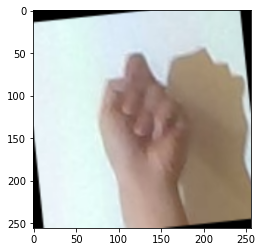

tensor([ 1.4997e-02,  3.6880e-02,  2.2283e-02, -7.1691e-04,  1.3702e-03,
         2.0116e-05], device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


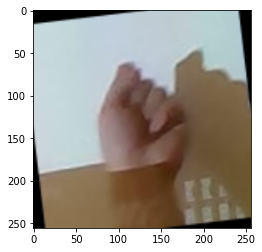

tensor([5.1276e-02, 8.0977e-02, 1.9315e-02, 1.2297e-02, 4.6411e-02, 1.5674e-05],
       device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


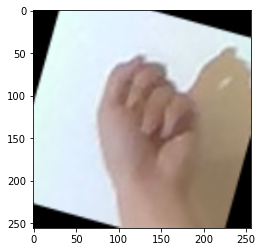

tensor([ 2.5015e-02,  6.5522e-02,  4.9374e-03, -3.5789e-03, -7.9341e-03,
         1.5603e-05], device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


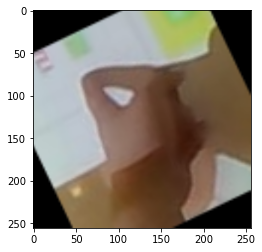

tensor([1.2894e-01, 2.0560e-01, 2.4204e-01, 2.0140e-01, 2.3005e-01, 1.7428e-05],
       device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


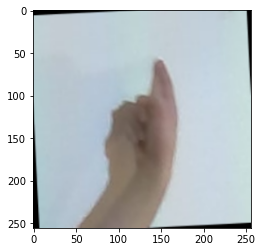

tensor([1.5108e-01, 2.0682e-01, 1.0368e-01, 7.3006e-02, 1.2122e-01, 2.1222e-05],
       device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


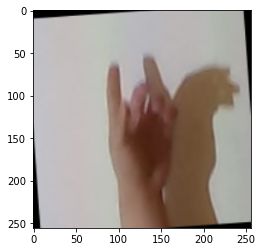

tensor([-9.3348e-02,  1.4833e-02, -5.1495e-02, -4.9807e-02, -1.3054e-02,
         1.6677e-05], device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0., 0., 0., 0., 0., 0.], device='cuda:0')


In [12]:
for i in range(0, 80, 10) :
    plt.imshow(input_imgs_np[i])
    plt.show()
    print(pred[i])
    print(labels[i])

In [21]:
crieterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(
    contact_regressor.parameters(),
    lr = 1e-4
)

In [26]:
for epoch in range(100) :
    pred = contact_regressor(input_imgs)
    loss = crieterion(pred, labels)
    print(epoch, loss)
    loss.backward()
    optimizer.step()

0 tensor(0.0618, device='cuda:0', grad_fn=<MseLossBackward0>)
1 tensor(0.0634, device='cuda:0', grad_fn=<MseLossBackward0>)
2 tensor(0.0631, device='cuda:0', grad_fn=<MseLossBackward0>)
3 tensor(0.0620, device='cuda:0', grad_fn=<MseLossBackward0>)
4 tensor(0.0601, device='cuda:0', grad_fn=<MseLossBackward0>)
5 tensor(0.0586, device='cuda:0', grad_fn=<MseLossBackward0>)
6 tensor(0.0586, device='cuda:0', grad_fn=<MseLossBackward0>)
7 tensor(0.0582, device='cuda:0', grad_fn=<MseLossBackward0>)
8 tensor(0.0573, device='cuda:0', grad_fn=<MseLossBackward0>)
9 tensor(0.0560, device='cuda:0', grad_fn=<MseLossBackward0>)
10 tensor(0.0550, device='cuda:0', grad_fn=<MseLossBackward0>)
11 tensor(0.0546, device='cuda:0', grad_fn=<MseLossBackward0>)
12 tensor(0.0547, device='cuda:0', grad_fn=<MseLossBackward0>)
13 tensor(0.0552, device='cuda:0', grad_fn=<MseLossBackward0>)
14 tensor(0.0553, device='cuda:0', grad_fn=<MseLossBackward0>)
15 tensor(0.0550, device='cuda:0', grad_fn=<MseLossBackward0>)
16

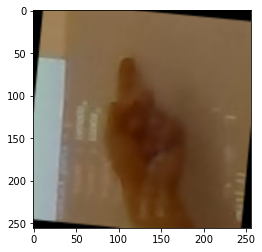

tensor([ 0.0352,  0.7027, -0.0490,  0.0551,  0.0919,  0.0091], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


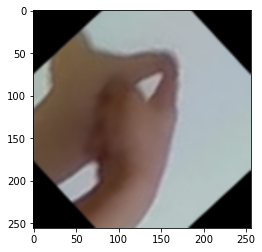

tensor([ 4.9618e-02,  7.3296e-01, -4.9332e-02,  5.7674e-02,  1.0153e-01,
         6.4940e-05], device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


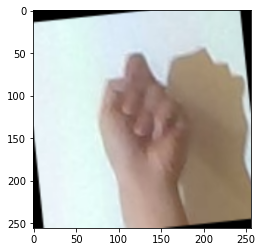

tensor([ 0.0454,  0.7218, -0.0506,  0.0556,  0.0975,  0.0028], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


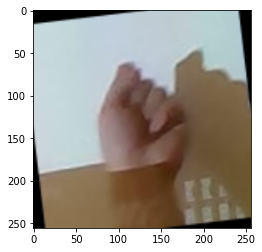

tensor([ 0.0461,  0.7254, -0.0490,  0.0572,  0.0991,  0.0023], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


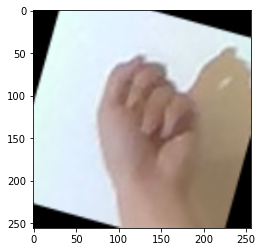

tensor([ 0.0454,  0.7216, -0.0527,  0.0536,  0.0968,  0.0026], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


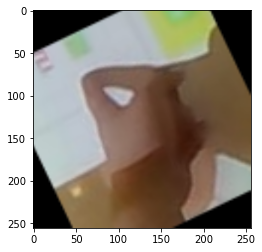

tensor([ 0.0444,  0.7206, -0.0500,  0.0558,  0.0971,  0.0034], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


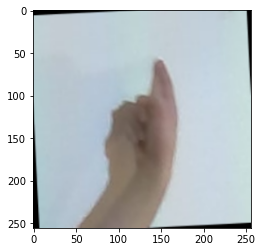

tensor([ 4.9187e-02,  7.3542e-01, -4.9376e-02,  5.8105e-02,  1.0260e-01,
        -4.9564e-04], device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0., 1., 0., 0., 0., 0.], device='cuda:0')


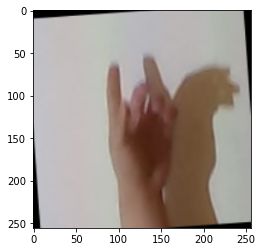

tensor([ 0.0453,  0.7244, -0.0489,  0.0578,  0.0987,  0.0027], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([0., 0., 0., 0., 0., 0.], device='cuda:0')


In [27]:
for i in range(0, 80, 10) :
    plt.imshow(input_imgs_np[i])
    plt.show()
    print(pred[i])
    print(labels[i])
    

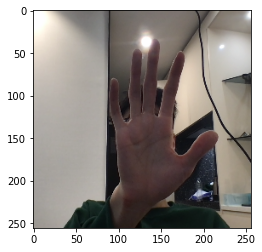

In [7]:
"""
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
for i in range(10) :
    ret, np_image = cap.read()
cap.release()


input_image_np = cv2.resize(
    cv2.cvtColor(
        np_image[:, 200:-200],
        cv2.COLOR_BGR2RGB
    ),
    (256, 256),
)

"""
input_image_np = cv2.imread("./sample_image.png")

input_image_tensor = torch.Tensor(
    input_image_np.transpose(2, 0, 1),
).unsqueeze(0) / 255.0

plt.imshow(input_image_np)

In [8]:
# blazehand
hand_flag, handed, landmarks_blaze = hand_regressor(input_image_tensor)
input_image_vis1 = input_image_np.copy()

draw_normalized_hand_landmarks_on_cropped(
    input_image_vis1,
    landmarks_blaze.detach()[0],
)
plt.imshow(input_image_vis1)
plt.show()

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands


# mediapipe
with mp_hands.Hands(
    static_image_mode = False,
    model_complexity  = 1,
    min_detection_confidence = 0.2,
    min_tracking_confidence =  0.2,
) as hands:

    results = hands.process(input_image_np)
    landmark_mediapipe  = []
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:            
            landmark_mediapipe.append(
                calc_normalized_landmark_list(hand_landmarks)
            )
    else :
        print("no hand")
        
    landmark_mediapipe = torch.Tensor(landmark_mediapipe)

    print(landmark_mediapipe.shape)

    input_image_vis2 = input_image_np.copy()
    draw_normalized_hand_landmarks_on_cropped(
        input_image_vis2,
        landmark_mediapipe[0]
    )

    plt.imshow(input_image_vis2)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [23]:
sss = landmark_mediapipe[0].numpy()

In [30]:
print(sss[[8, 12, 16, 20], :2])
print(sss[[8, 12, 16, 20], :2].mean(axis = 0))

[[0.50352407 0.32724124]
 [0.410959   0.3276572 ]
 [0.35219473 0.3579629 ]
 [0.2674141  0.4279794 ]]
[0.383523   0.36021018]


In [11]:
print(landmark_mediapipe.shape, landmarks_blaze.shape)
print(landmark_mediapipe.dtype, landmarks_blaze.dtype)


torch.Size([1, 21, 3]) torch.Size([1, 21, 3])
torch.float32 torch.float32


In [12]:
batch_size = 20
net_inputs = torch.stack([
    input_image_tensor[0] for i in range(batch_size)
])
net_target = torch.stack(
    [landmark_mediapipe[0] for i in range(batch_size)]
)
net_inputs.shape, net_target.shape

In [13]:
model = BlazeHandLandmark()
model.load_weights("./blazehand2.pth")

(torch.Size([20, 3, 256, 256]), torch.Size([20, 21, 3]))

In [15]:
crieterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(
    params=model.parameters(),
    lr = 0.001,
)

In [16]:
import tqdm
epochs = 10

net_inputs.requires_grad_(True)


for epoch in range(epochs) :

    optimizer.zero_grad()

    _, _, hand_landmark_pred = model(
        net_inputs
    )

    #print(hand_landmark_pred.requires_grad)

    loss = crieterion(hand_landmark_pred, net_target)
    loss.requires_grad_(True)
    print(f"epc:{epoch}, loss:{loss}")
    loss.backward()
    optimizer.step()


True
True
xyzw
True True True True
True

epc:0, loss:0.01775684580206871
True
True
xyzw
True True True True
True

epc:1, loss:0.002031185431405902
True
True
xyzw
True True True True
True

epc:2, loss:0.007478938903659582
True
True
xyzw
True True True True
True

epc:3, loss:0.0033787209540605545
True
True
xyzw
True True True True
True

epc:4, loss:0.0009936989517882466
True
True
xyzw
True True True True
True

epc:5, loss:0.0004017524770461023
True
True
xyzw
True True True True
True

epc:6, loss:0.0003421874425839633
True
True
xyzw
True True True True
True

epc:7, loss:0.0002102464932249859
True
True
xyzw
True True True True
True

epc:8, loss:0.0001718271232675761
True
True
xyzw
True True True True
True

epc:9, loss:0.00018880743300542235


False
True
xyzw
True True True True
True



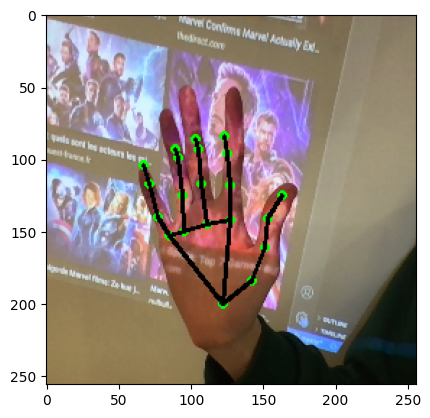

torch.Size([1, 21, 3])


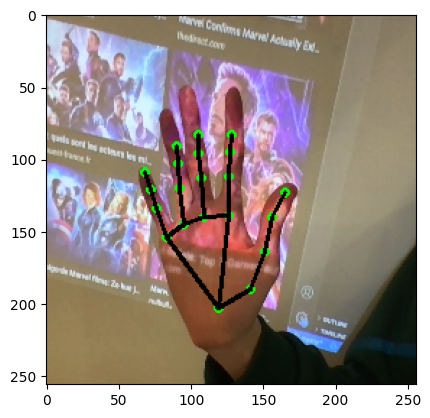

In [17]:
# blazehand
hand_flag, handed, landmarks_blaze = model(input_image_tensor)
input_image_vis1 = input_image_np.copy()
draw_normalized_hand_landmarks_on_cropped(
    input_image_vis1,
    landmarks_blaze.detach()[0],
)
plt.imshow(input_image_vis1)
plt.show()


mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands


# mediapipe
with mp_hands.Hands(
    static_image_mode = False,
    model_complexity  = 1,
    min_detection_confidence = 0.2,
    min_tracking_confidence =  0.2,
) as hands:

    results = hands.process(input_image_np)
    landmark_mediapipe  = []
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:            
            landmark_mediapipe.append(
                calc_normalized_landmark_list(hand_landmarks)
            )
    else :
        print("no hand")
        
    landmark_mediapipe = torch.Tensor(landmark_mediapipe)

    print(landmark_mediapipe.shape)

    input_image_vis2 = input_image_np.copy()
    draw_normalized_hand_landmarks_on_cropped(
        input_image_vis2,
        landmark_mediapipe[0]
    )

    plt.imshow(input_image_vis2)

In [19]:
torch.save(
    model.state_dict(),
    "blazehand2.pth"
)